                           ASSIGNMENT on ENSEMBLE TECHNIQUES by AADISH AGRAWAL
                           
comments - The Visualization part of your analysis is highly appreciable. it would add more value to your project if you give even more detailed insights as you may need to observe the dataset. Like, duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.Target variable ,response rate is only 11.6%. Hence the Y variable has a high class imbalance. Hence accuracy will not be a reliable model performance measure.Hence the most relevant model performance measure is recall. Decision Tree is a non-parametric algorithm and hence prone to over fitting easily. This is evident from the difference in scores in training and testing. In ensemble techniques, we want multiple instances (each different from the other) and each instance to be over fit!!! hopefully, the different instances will do different mistakes in classification and when we club them, their errors will get cancelled out giving us the benefit of lower bias and lower overall variance errors. And also you have to give the advantages & disadvantages of model used in your project. Overall you have done a nice job.                           

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
df_cust = pd.read_csv("bank-full.csv")
df_cust.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


               Deliverable – 1 (Exploratory data quality report reflecting the following)
                                 1.1 Univariate analysis
age          int64 datatype with min age 18 and max 95, which seems to contain few outliers
job          categorical datatype with 12 different category with mode of value "blue-collar"
marital      categorical datatype with 3 different category with mode of value "married"
education    categorical datatype with 4 different category with mode of value "secondary"
default      categorical datatype with 2 different category with mode of value "no" of frequency 44396
balance      int64 datatype with min balance -8019 and max 102127, which seems to contain few outliers and     
             large standard deviation of approx 3044
housing     categorical datatype with 2 different category with mode of value "yes" of frequency 25130
loan        categorical datatype with 2 different category with mode of value "no" of frequency 37967
contact     categorical datatype with 3 different category with mode of value "cellular" of frequency 29285
day         int64 ranges from 1 to 31 with median at 16
month       categorical datatype with 12 different category with mode of value "may" of frequency 13766
duration    int64 datatype with min duration 0 and max 4918 seconds , which seems to contain few outliers
campaign    int64 datatype with min campaign 1 and max 63 , which seems to contain few outliers
pdays        int64 datatype with more than 75% of population contain -1 and max value 871
previous     int64 datatype with more than 75% of population contain 0 and max value 275
poutcome     categorical datatype with 4 different category with mode of value "unknown" of frequency 36959
Target       categorical datatype with 2 different category with mode of value "no" of frequency 39922

In [3]:
df_cust.describe(include="all")

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
count,45211.000000,45211,45211,45211,45211,45211.000000,45211,45211,45211,45211.000000,45211,45211.000000,45211.000000,45211.000000,45211.000000,45211,45211
unique,NaN,12,3,4,2,NaN,2,2,3,NaN,12,NaN,NaN,NaN,NaN,4,2
top,NaN,blue-collar,married,secondary,no,NaN,yes,no,cellular,NaN,may,NaN,NaN,NaN,NaN,unknown,no
freq,NaN,9732,27214,23202,44396,NaN,25130,37967,29285,NaN,13766,NaN,NaN,NaN,NaN,36959,39922
mean,40.936210,NaN,NaN,NaN,NaN,1362.272058,NaN,NaN,NaN,15.806419,NaN,258.163080,2.763841,40.197828,0.580323,NaN,NaN
std,10.618762,NaN,NaN,NaN,NaN,3044.765829,NaN,NaN,NaN,8.322476,NaN,257.527812,3.098021,100.128746,2.303441,NaN,NaN
min,18.000000,NaN,NaN,NaN,NaN,-8019.000000,NaN,NaN,NaN,1.000000,NaN,0.000000,1.000000,-1.000000,0.000000,NaN,NaN
25%,33.000000,NaN,NaN,NaN,NaN,72.000000,NaN,NaN,NaN,8.000000,NaN,103.000000,1.000000,-1.000000,0.000000,NaN,NaN
50%,39.000000,NaN,NaN,NaN,NaN,448.000000,NaN,NaN,NaN,16.000000,NaN,180.000000,2.000000,-1.000000,0.000000,NaN,NaN
75%,48.000000,NaN,NaN,NaN,NaN,1428.000000,NaN,NaN,NaN,21.000000,NaN,319.000000,3.000000,-1.000000,0.000000,NaN,NaN


In [4]:
df_cust.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
age          45211 non-null int64
job          45211 non-null object
marital      45211 non-null object
education    45211 non-null object
default      45211 non-null object
balance      45211 non-null int64
housing      45211 non-null object
loan         45211 non-null object
contact      45211 non-null object
day          45211 non-null int64
month        45211 non-null object
duration     45211 non-null int64
campaign     45211 non-null int64
pdays        45211 non-null int64
previous     45211 non-null int64
poutcome     45211 non-null object
Target       45211 non-null object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [5]:
df_cust.shape

(45211, 17)

In [6]:
print('Job')
print(df_cust['job'].value_counts())
print('Marital')
print(df_cust['marital'].value_counts())
print('Education')
print(df_cust['education'].value_counts())
print('Default')
print(df_cust['default'].value_counts())
print('Housing')
print(df_cust['housing'].value_counts())
print('Loan')
print(df_cust['loan'].value_counts())
print('Contact')
print(df_cust['contact'].value_counts())
print('Month')
print(df_cust['month'].value_counts())
print('Poutcome')
print(df_cust['poutcome'].value_counts())
print('Target Variable')
print(df_cust['Target'].value_counts())


Job
blue-collar      9732
management       9458
technician       7597
admin.           5171
services         4154
retired          2264
self-employed    1579
entrepreneur     1487
unemployed       1303
housemaid        1240
student           938
unknown           288
Name: job, dtype: int64
Marital
married     27214
single      12790
divorced     5207
Name: marital, dtype: int64
Education
secondary    23202
tertiary     13301
primary       6851
unknown       1857
Name: education, dtype: int64
Default
no     44396
yes      815
Name: default, dtype: int64
Housing
yes    25130
no     20081
Name: housing, dtype: int64
Loan
no     37967
yes     7244
Name: loan, dtype: int64
Contact
cellular     29285
unknown      13020
telephone     2906
Name: contact, dtype: int64
Month
may    13766
jul     6895
aug     6247
jun     5341
nov     3970
apr     2932
feb     2649
jan     1403
oct      738
sep      579
mar      477
dec      214
Name: month, dtype: int64
Poutcome
unknown    36959
failure     490

Distribution of data across the columns

Age
AxesSubplot(0.125,0.125;0.775x0.755)


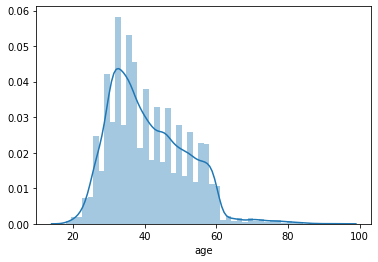

In [7]:
print('Age')
print(sns.distplot(df_cust['age']))

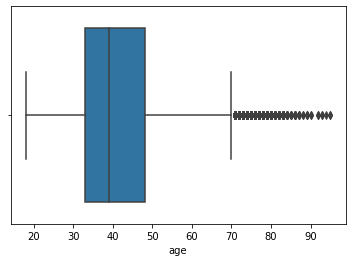

In [8]:
sns.boxplot(df_cust['age'])

Balance


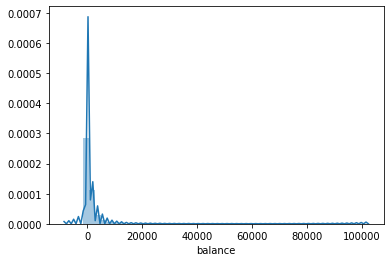

In [9]:
print('Balance')
sns.distplot(df_cust['balance'])

AxesSubplot(0.125,0.125;0.775x0.755)


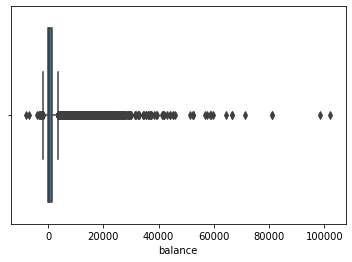

In [10]:
print(sns.boxplot(df_cust['balance']))

Day
AxesSubplot(0.125,0.125;0.775x0.755)


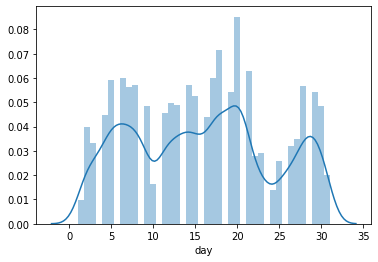

In [11]:
print('Day')
print(sns.distplot(df_cust['day']))

AxesSubplot(0.125,0.125;0.775x0.755)


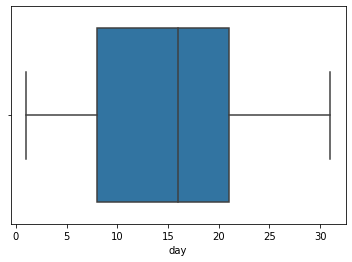

In [12]:
print(sns.boxplot(df_cust['day']))

Duration


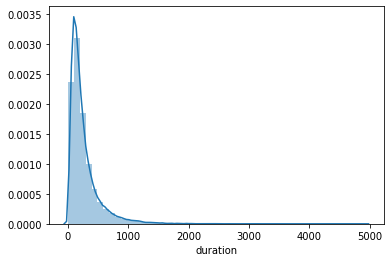

In [13]:
print('Duration')
sns.distplot(df_cust['duration'])

AxesSubplot(0.125,0.125;0.775x0.755)


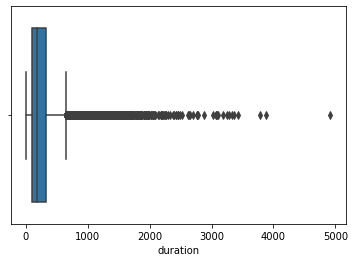

In [14]:
print(sns.boxplot(df_cust['duration']))

campaign


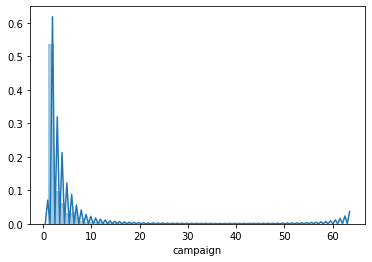

In [15]:
print('campaign')
sns.distplot(df_cust['campaign'])

AxesSubplot(0.125,0.125;0.775x0.755)


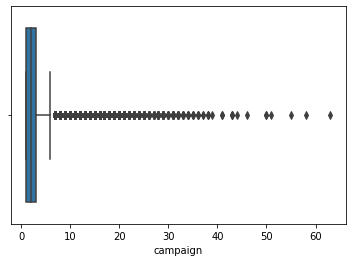

In [16]:
print(sns.boxplot(df_cust['campaign']))

pdays


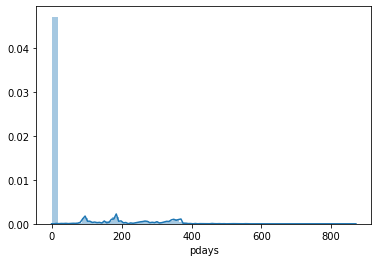

In [17]:
print('pdays')
sns.distplot(df_cust['pdays'])

AxesSubplot(0.125,0.125;0.775x0.755)


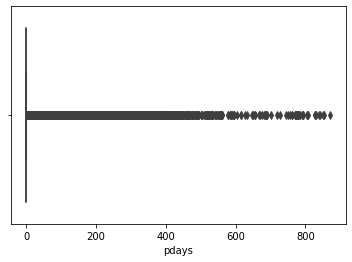

In [18]:
print(sns.boxplot(df_cust['pdays']))

previous


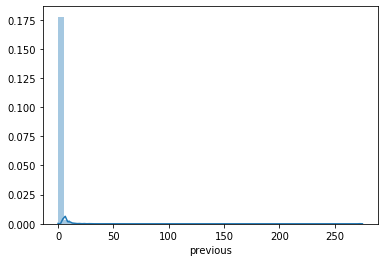

In [19]:
print('previous')
sns.distplot(df_cust['previous'])

AxesSubplot(0.125,0.125;0.775x0.755)


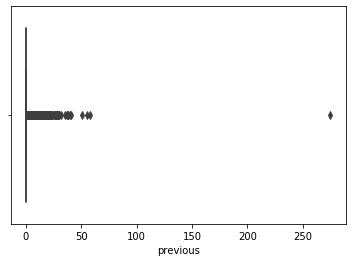

In [20]:
print(sns.boxplot(df_cust['previous']))

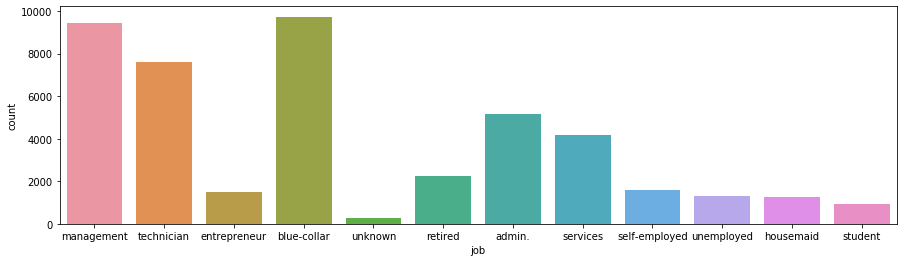

In [21]:
plt.figure(figsize=(15,4))
sns.countplot(df_cust['job'])

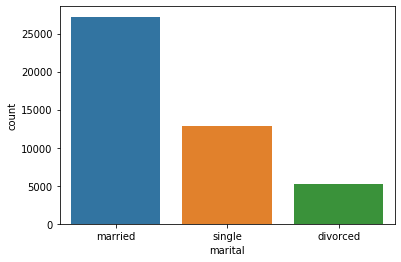

In [22]:
sns.countplot(df_cust['marital'])

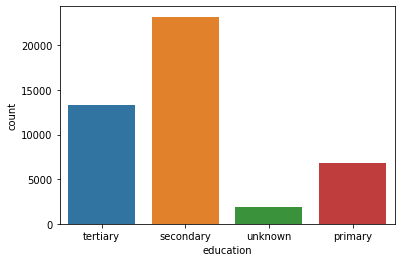

In [23]:
sns.countplot(df_cust['education'])

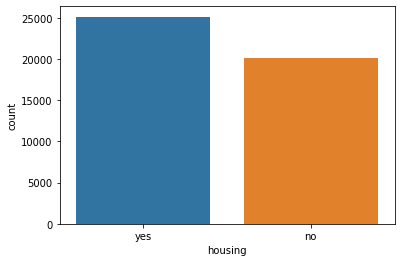

In [24]:
sns.countplot(df_cust['housing'])

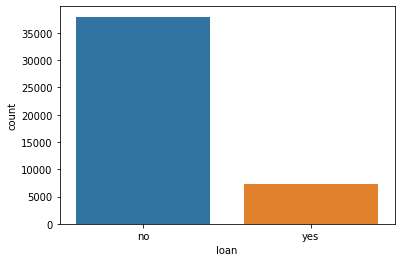

In [25]:
sns.countplot(df_cust['loan'])

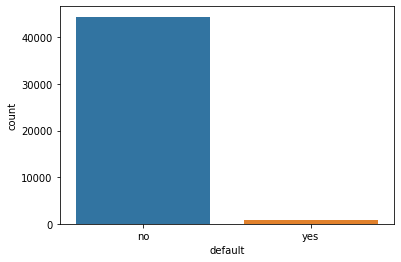

In [26]:
sns.countplot(df_cust['default'])

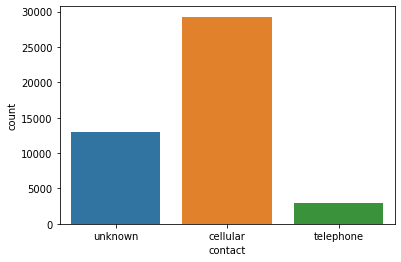

In [27]:
sns.countplot(df_cust['contact'])

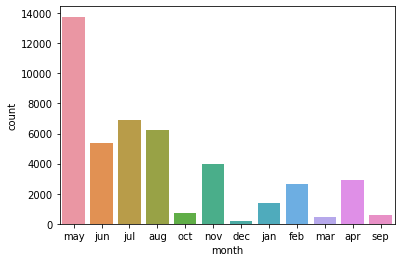

In [28]:
sns.countplot(df_cust['month'])

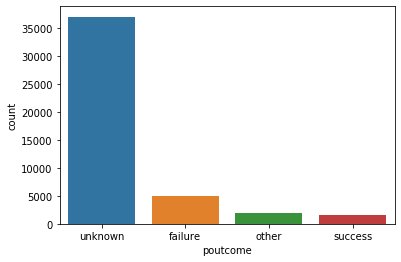

In [29]:
sns.countplot(df_cust['poutcome'])

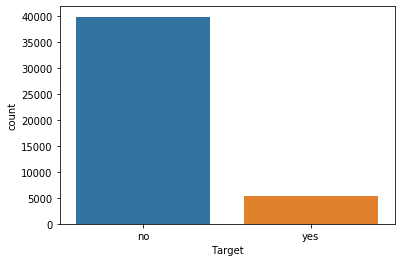

In [30]:
sns.countplot(df_cust['Target'])

    1.2 Strategies to address the different data challenges such as data pollution, outliers and missing                                                 values
    
NOTE: Considering datapoint as outlier if value crosses 2 standard deviation from the median value
A. No missing value or data pollution present
B. Outliers are present in numerous attributes


In [31]:
for i in df_cust.columns:
  print(df_cust[i].isna().value_counts())

False    45211
Name: age, dtype: int64
False    45211
Name: job, dtype: int64
False    45211
Name: marital, dtype: int64
False    45211
Name: education, dtype: int64
False    45211
Name: default, dtype: int64
False    45211
Name: balance, dtype: int64
False    45211
Name: housing, dtype: int64
False    45211
Name: loan, dtype: int64
False    45211
Name: contact, dtype: int64
False    45211
Name: day, dtype: int64
False    45211
Name: month, dtype: int64
False    45211
Name: duration, dtype: int64
False    45211
Name: campaign, dtype: int64
False    45211
Name: pdays, dtype: int64
False    45211
Name: previous, dtype: int64
False    45211
Name: poutcome, dtype: int64
False    45211
Name: Target, dtype: int64


In [32]:
for i in df_cust.columns:
  print(df_cust[i].isnull().value_counts())

False    45211
Name: age, dtype: int64
False    45211
Name: job, dtype: int64
False    45211
Name: marital, dtype: int64
False    45211
Name: education, dtype: int64
False    45211
Name: default, dtype: int64
False    45211
Name: balance, dtype: int64
False    45211
Name: housing, dtype: int64
False    45211
Name: loan, dtype: int64
False    45211
Name: contact, dtype: int64
False    45211
Name: day, dtype: int64
False    45211
Name: month, dtype: int64
False    45211
Name: duration, dtype: int64
False    45211
Name: campaign, dtype: int64
False    45211
Name: pdays, dtype: int64
False    45211
Name: previous, dtype: int64
False    45211
Name: poutcome, dtype: int64
False    45211
Name: Target, dtype: int64


In [33]:
df_cust[df_cust['balance']<0].head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
25,44,admin.,married,secondary,no,-372,yes,no,unknown,5,may,172,1,-1,0,unknown,no
28,46,management,single,secondary,no,-246,yes,no,unknown,5,may,255,2,-1,0,unknown,no
36,25,blue-collar,married,secondary,no,-7,yes,no,unknown,5,may,365,1,-1,0,unknown,no
37,53,technician,married,secondary,no,-3,no,no,unknown,5,may,1666,1,-1,0,unknown,no
45,36,admin.,single,primary,no,-171,yes,no,unknown,5,may,242,1,-1,0,unknown,no
46,58,self-employed,married,tertiary,no,-364,yes,no,unknown,5,may,355,1,-1,0,unknown,no
51,48,management,divorced,tertiary,no,-244,yes,no,unknown,5,may,253,1,-1,0,unknown,no
53,42,admin.,single,secondary,no,-76,yes,no,unknown,5,may,787,1,-1,0,unknown,no
54,24,technician,single,secondary,no,-103,yes,yes,unknown,5,may,145,1,-1,0,unknown,no
94,57,entrepreneur,divorced,secondary,no,-37,no,no,unknown,5,may,173,1,-1,0,unknown,no


In [34]:
print("Number of outliers for age")
print(df_cust[df_cust['age']>70]['age'].value_counts().sum())
print("Number of outliers for balance")
print(df_cust[df_cust['balance']>7000]['balance'].value_counts().sum())
print("Number of outliers for duration")
print(df_cust[df_cust['duration']>700]['duration'].value_counts().sum())
print("Number of outliers for campaign")
print(df_cust[df_cust['campaign']>8]['campaign'].value_counts().sum())
print("Number of outliers for pdays")
print(df_cust[df_cust['pdays']>200]['pdays'].value_counts().sum())
print("Number of outliers for previous")
print(df_cust[df_cust['previous']>2]['previous'].value_counts().sum())

Number of outliers for age
487
Number of outliers for balance
1626
Number of outliers for duration
2665
Number of outliers for campaign
1789
Number of outliers for pdays
3954
Number of outliers for previous
3379


                                   1.3 Multivariate Analysis
                                   
A. Customers who are defaulted or opted for loan had low frequency for subscribing of term deposit
B. Mostly cellular contact has opted for subscribing of term deposit

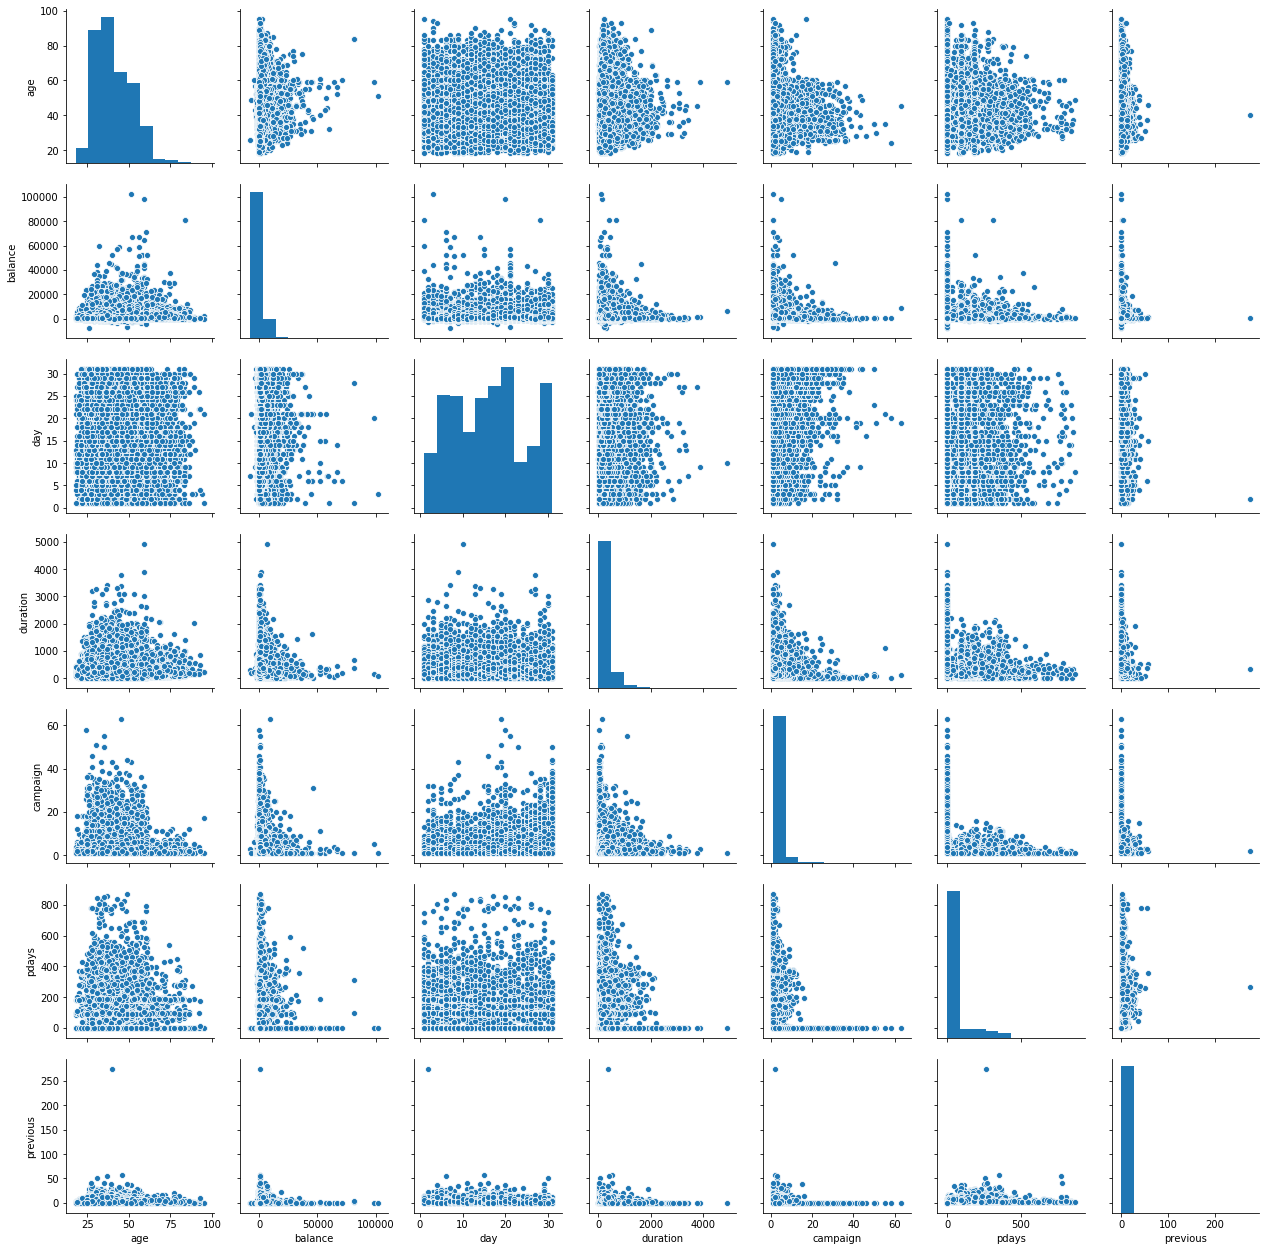

In [35]:
sns.pairplot(df_cust)

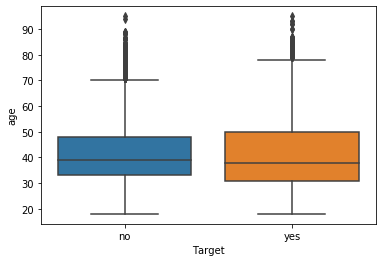

In [36]:
sns.boxplot(df_cust['Target'],df_cust['age'])

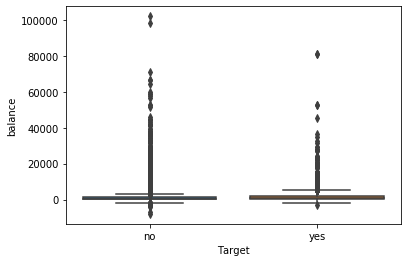

In [37]:
sns.boxplot(df_cust['Target'],df_cust['balance'])

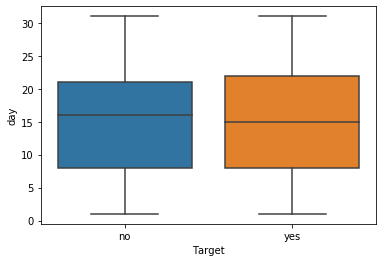

In [38]:
sns.boxplot(df_cust['Target'],df_cust['day'])

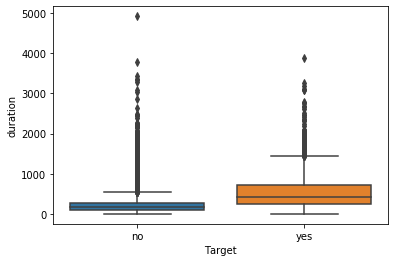

In [39]:
sns.boxplot(df_cust['Target'],df_cust['duration'])

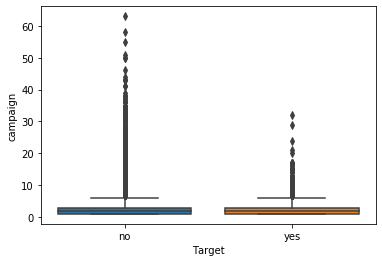

In [40]:
sns.boxplot(df_cust['Target'],df_cust['campaign'])

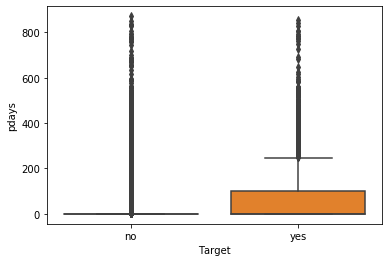

In [41]:
sns.boxplot(df_cust['Target'],df_cust['pdays'])

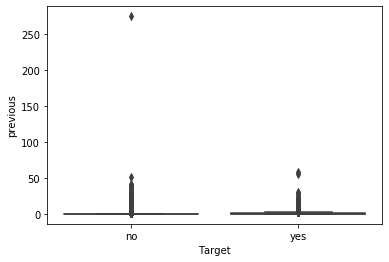

In [42]:
sns.boxplot(df_cust['Target'],df_cust['previous'])

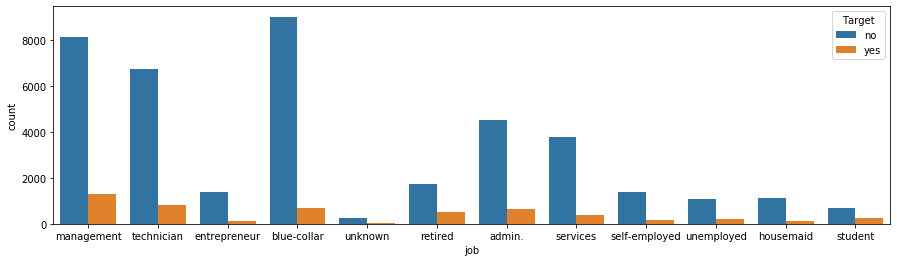

In [43]:
plt.figure(figsize=(15,4))
sns.countplot(df_cust['job'],hue = df_cust['Target'])

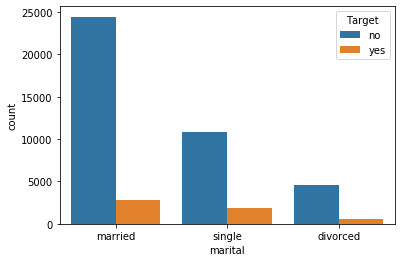

In [44]:
sns.countplot(df_cust['marital'],hue = df_cust['Target'])

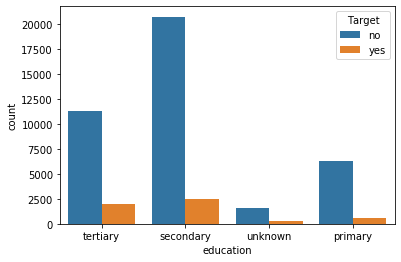

In [45]:
sns.countplot(df_cust['education'],hue = df_cust['Target'])

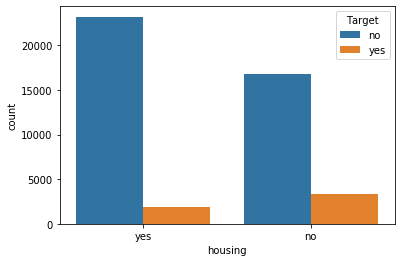

In [46]:
sns.countplot(df_cust['housing'],hue = df_cust['Target'])

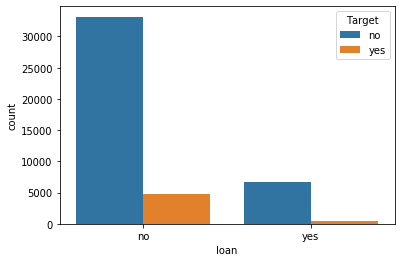

In [47]:
sns.countplot(df_cust['loan'],hue = df_cust['Target'])

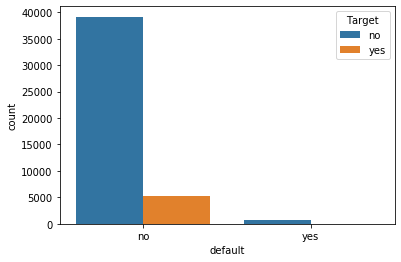

In [48]:
sns.countplot(df_cust['default'],hue = df_cust['Target'])

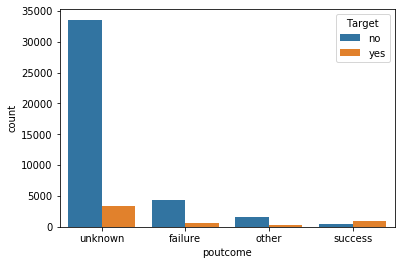

In [49]:
sns.countplot(df_cust['poutcome'],hue = df_cust['Target'])

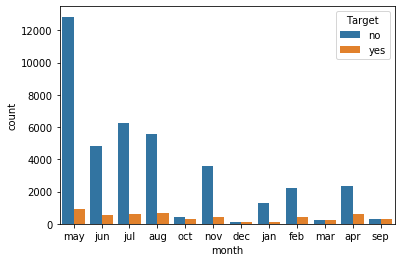

In [50]:
sns.countplot(df_cust['month'],hue = df_cust['Target'])

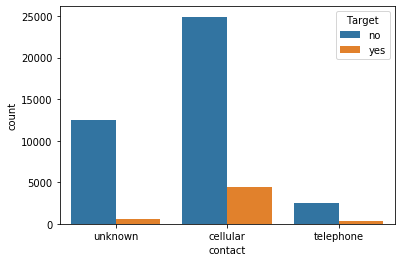

In [51]:
sns.countplot(df_cust['contact'],hue = df_cust['Target'])

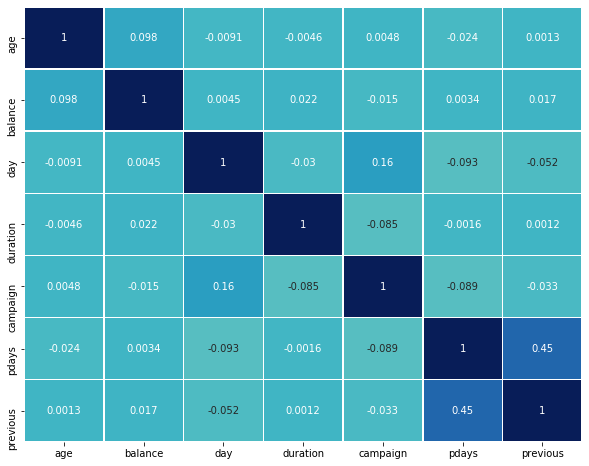

In [52]:
plt.figure(figsize=(10,8))
sns.heatmap(df_cust.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=False,
            cmap="YlGnBu")

                         Deliverable – 2 (Prepare the data for analytics)

In [53]:
df1 = df_cust.copy()

In [54]:
#Converting object to category datatype
for i in df1.columns:
    if df1[i].dtype == 'object':
        df1[i] = pd.Categorical(df1[i])
df1.head(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,Target
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no
6,28,management,single,tertiary,no,447,yes,yes,unknown,5,may,217,1,-1,0,unknown,no
7,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
8,58,retired,married,primary,no,121,yes,no,unknown,5,may,50,1,-1,0,unknown,no
9,43,technician,single,secondary,no,593,yes,no,unknown,5,may,55,1,-1,0,unknown,no


In [55]:
#Converting category to integer variable
replaceStruct = {
                "housing":     {"no": 0, "yes": 1 },
                 "loan":     {"no": 0, "yes": 1 },
                "default":     {"no": 0, "yes": 1 },
                "education":     {"primary": 1, "secondary": 2, "tertiary": 3, "unknown": -1 },
                "month":     {"jan": 1, "feb": 2, "mar": 3, "apr": 4,"may": 5, "jun": 6, "jul": 7,
                             "aug": 8, "sep": 9, "oct": 10, "nov": 11, "dec": 12 },
                 "Target":     {"no": 0, "yes": 1 }
                    }
oneHotCols=["job","marital","contact","poutcome"]

In [56]:
df1=df1.replace(replaceStruct)
df1=pd.get_dummies(df1, columns=oneHotCols)
df1.head(10)

,age,education,default,balance,housing,loan,day,month,duration,campaign,...,marital_divorced,marital_married,marital_single,contact_cellular,contact_telephone,contact_unknown,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,3,0,2143,1,0,5,5,261,1,...,0,1,0,0,0,1,0,0,0,1
1,44,2,0,29,1,0,5,5,151,1,...,0,0,1,0,0,1,0,0,0,1
2,33,2,0,2,1,1,5,5,76,1,...,0,1,0,0,0,1,0,0,0,1
3,47,-1,0,1506,1,0,5,5,92,1,...,0,1,0,0,0,1,0,0,0,1
4,33,-1,0,1,0,0,5,5,198,1,...,0,0,1,0,0,1,0,0,0,1
5,35,3,0,231,1,0,5,5,139,1,...,0,1,0,0,0,1,0,0,0,1
6,28,3,0,447,1,1,5,5,217,1,...,0,0,1,0,0,1,0,0,0,1
7,42,3,1,2,1,0,5,5,380,1,...,1,0,0,0,0,1,0,0,0,1
8,58,1,0,121,1,0,5,5,50,1,...,0,1,0,0,0,1,0,0,0,1
9,43,2,0,593,1,0,5,5,55,1,...,0,0,1,0,0,1,0,0,0,1


In [57]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 35 columns):
age                  45211 non-null int64
education            45211 non-null int64
default              45211 non-null int64
balance              45211 non-null int64
housing              45211 non-null int64
loan                 45211 non-null int64
day                  45211 non-null int64
month                45211 non-null int64
duration             45211 non-null int64
campaign             45211 non-null int64
pdays                45211 non-null int64
previous             45211 non-null int64
Target               45211 non-null int64
job_admin.           45211 non-null uint8
job_blue-collar      45211 non-null uint8
job_entrepreneur     45211 non-null uint8
job_housemaid        45211 non-null uint8
job_management       45211 non-null uint8
job_retired          45211 non-null uint8
job_self-employed    45211 non-null uint8
job_services         45211 non-null uint8
job_stude

In [58]:
X = df1.drop('Target' , axis=1)
y = df1.pop("Target")


In [59]:
#Spliting in 70:30 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.30, random_state=1)

                     Deliverable – 3 (create the ensemble model)
                     
Performance summary of different basic classifier model along with bagging and boosting performance

Model              Basic_Model            Bagging         AdaBoosting        Gradient Boosting    Random Forest

Decision Tree     87.2%                    90.62%          90.06%              91.05%               90.93%
                  89.9%(Pruning) 
Logit Regressn.   90.12%                   90.09%          89.70%               -                     -

Naive Bayes       82.85%                   82.65%          42.17%               -                     - 

KNN               88.70%                   88.91%            -                  -                     - 



A. Out of all Decision Tree with Gradient Boosting and Random Forest shows highest accuracy, it is a powerful model that can perform better with large number of attributes in the dataset and has negligible affect due to outliers which this dataset has contain. Thus, Decision tree seems to be appropriate selection of model.
B. Advantages of Decision tree:
1. It is Powerful model with simple implementation
2. Robust to outliers
3. Can work with numerical and categorical features.
C. Disadvantages of Decision tree:
1. It is prone to overfit 

Random Forest has better accuracy than base decision model as ensemble technique tend to neutralise the effect of overfitting produce by decision tree as well as it has less variance in the output. Thus Random Forest has performed better than decision tree.

                   3.1 Ensemble technique using Decision Tree

In [60]:
#Here using gini impurity index for spliting measure
dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=1, splitter='best')

In [61]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

1.0
0.87223532881156


0.87223532881156


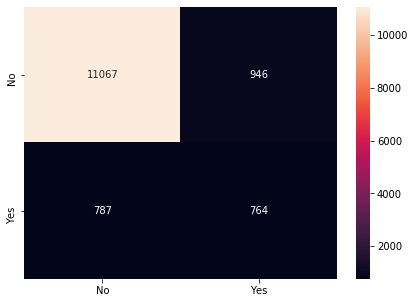

In [62]:
print(dTree.score(X_test , y_test))
y_predict = dTree.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


In [63]:
print("precision")
Numerator = 764 #True Positive
Denominator = 764 + 946 #Summation of True and False Positive
print(Numerator/Denominator)
print("Recall")
Numerator = 764 #True Positive
Denominator = 764 + 787 #Summation of True Positive and False Negative
print(Numerator/Denominator)

precision
0.44678362573099417
Recall
0.49258542875564154


                                        Reducing overfit

Regularization techniques used for the model: 
This can either be done by pruning the model that is in case of decision tree restricting the depth which will result in avoiding overfitting of data or using Ensemble techniques like Bagging & Boosting where variance as well overfit of data will decrease which will result in better performance.


In [64]:
#Here using gini impurity index for spliting measure and maximum depth of the trees as 5 to reduce the overfitting
dTreeR = DecisionTreeClassifier(criterion = 'gini', max_depth = 5, random_state=100)
dTreeR.fit(X_train, y_train)
print(dTreeR.score(X_train, y_train))
print(dTreeR.score(X_test, y_test))

0.9026132018832749
0.899955765260985


0.899955765260985


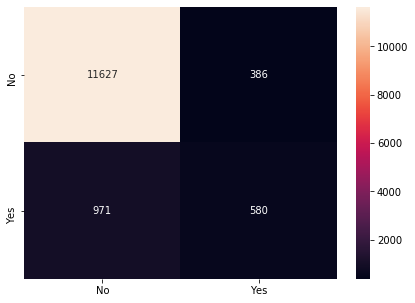

In [65]:
print(dTreeR.score(X_test , y_test))
y_predict = dTreeR.predict(X_test)

cm=metrics.confusion_matrix(y_test, y_predict, labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


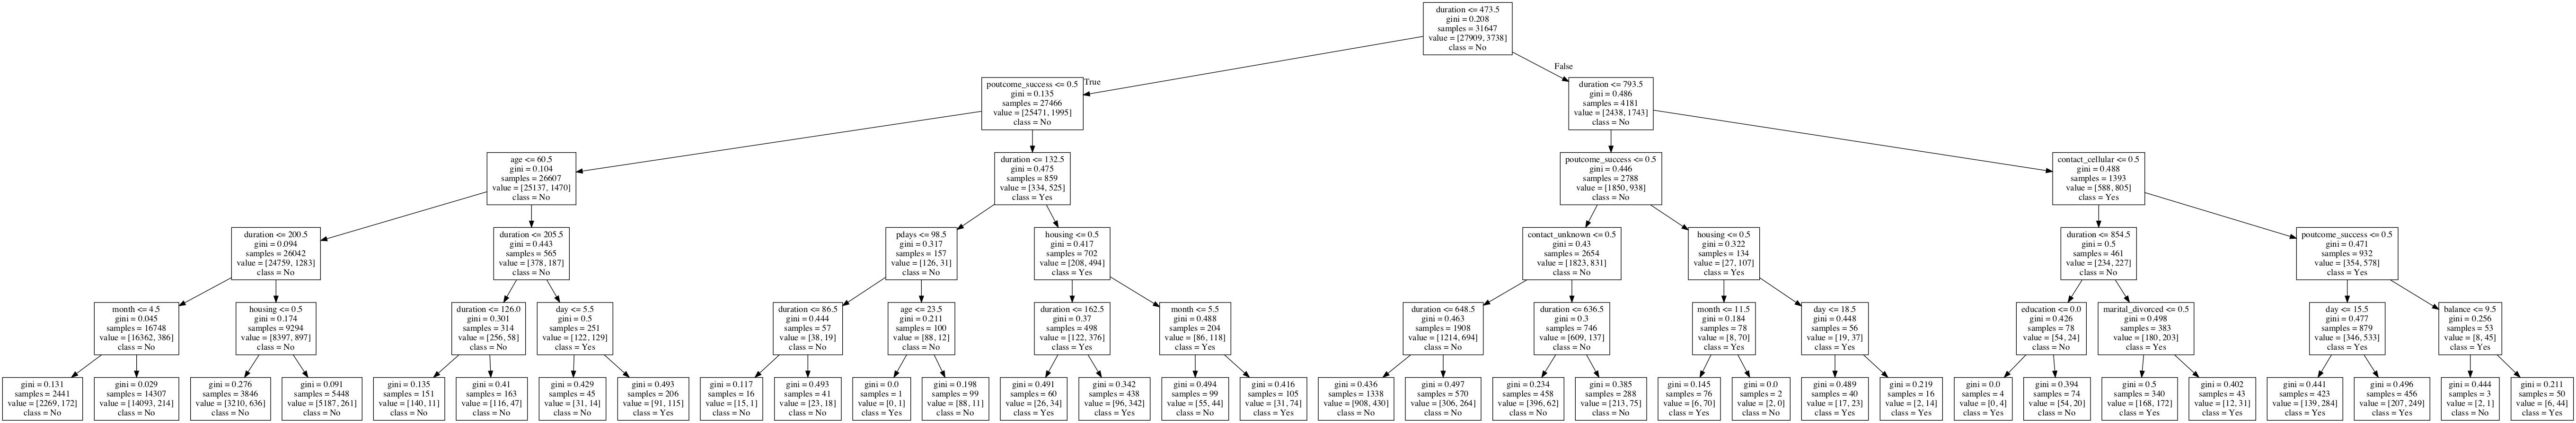

In [66]:
train_char_label = ['No', 'Yes']
Tree_FileR = open('treeR.dot','w')
dot_data = tree.export_graphviz(dTreeR, out_file=Tree_FileR, feature_names = list(X_train), class_names = list(train_char_label))
Tree_FileR.close()

#Works only if "dot" command works on you machine

retCode = system("dot -Tpng treeR.dot -o treeR.png")
if(retCode>0):
    print("system command returning error: "+str(retCode))
else:
    display(Image("treeR.png"))

                           Ensemble Learning - Bagging

In [67]:
#Here base model for bagging has been choosen as previous decision tree model with number of samples(decision tree) as 50
from sklearn.ensemble import BaggingClassifier

bgcl = BaggingClassifier( base_estimator=dTree,n_estimators=50, random_state=100)
bgcl = bgcl.fit(X_train, y_train)



0.9062960778531407


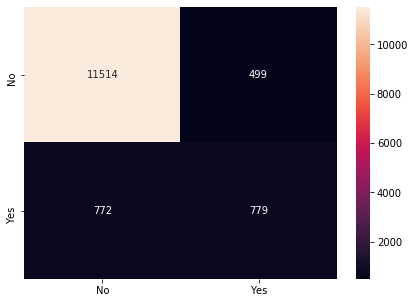

In [68]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



                          Ensemble Learning - AdaBoosting

In [69]:
#Here number of samples(decision tree) is selected as 50
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators=50, random_state=100)
#abcl = AdaBoostClassifier( n_estimators=50,random_state=1)
abcl = abcl.fit(X_train, y_train)

0.9006192863462106


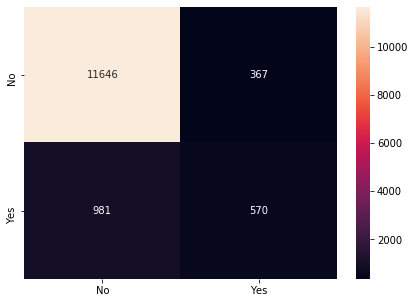

In [70]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


                          Ensemble Learning - GradientBoost

In [71]:
#Here number of samples(decision tree) selected as 100 with maximum depth of each tree as 5 and maximum feature for consideration during each split is 12

from sklearn.ensemble import GradientBoostingClassifier
gbcl = GradientBoostingClassifier(n_estimators = 100,random_state=100, max_depth = 5,max_features = 12)
gbcl = gbcl.fit(X_train, y_train)



0.9105721026245945


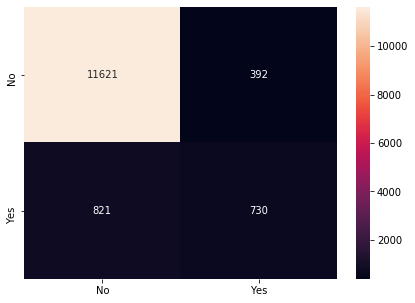

In [72]:
y_predict = gbcl.predict(X_test)
print(gbcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [73]:
print("precision")
Numerator = 730 #True Positive
Denominator = 730 + 392 #Summation of True and False Positive
print(Numerator/Denominator)
print("Recall")
Numerator = 730 #True Positive
Denominator = 730 + 821 #Summation of True Positive and False Negative
print(Numerator/Denominator)

precision
0.6506238859180036
Recall
0.4706640876853643


                         Ensemble RandomForest Classifier

In [74]:
#Here number of samples(decision tree) selected as 94 with maximum feature for consideration during each split is 12
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 94, criterion='gini', random_state=100,max_features=12)
rfcl = rfcl.fit(X_train, y_train)

0.9093187850191684


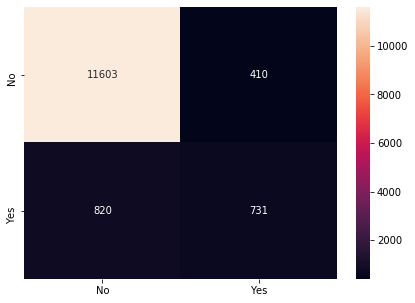

In [75]:
y_predict = rfcl.predict(X_test)
print(rfcl.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

In [76]:
print("precision")
Numerator = 731 #True Positive
Denominator = 731 + 410 #Summation of True and False Positive
print(Numerator/Denominator)
print("Recall")
Numerator = 731 #True Positive
Denominator = 731 + 820 #Summation of True Positive and False Negative
print(Numerator/Denominator)

precision
0.6406660823838738
Recall
0.47130883301096066


                  3.2 Ensemble technique using Logistic Regression model

In [77]:
from sklearn.linear_model import LogisticRegression
Logit_model = LogisticRegression(solver='liblinear')
Logit_model.fit(X_train,y_train)
y_predict = Logit_model.predict(X_test)
Logit_model_score = Logit_model.score(X_test,y_test)
print(Logit_model_score)

0.9012090828664111


                           Ensemble Learning - Bagging(LOGIT Regression)

In [78]:
bgcl = BaggingClassifier( base_estimator=Logit_model,n_estimators=10, random_state=22)
bgcl = bgcl.fit(X_train, y_train)


0.9009141846063108


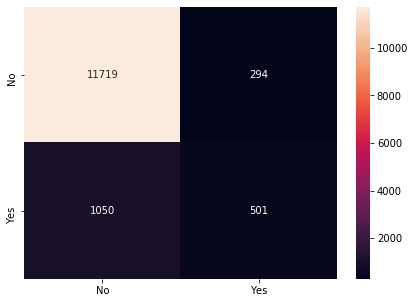

In [79]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')



In [80]:
# Ensemble Learning - AdaBoosting
abcl = AdaBoostClassifier(base_estimator = Logit_model,n_estimators=50, random_state=100)
abcl = abcl.fit(X_train, y_train)

0.8970067826599823


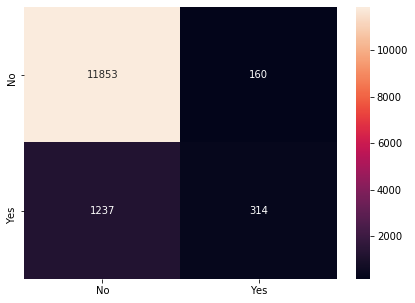

In [81]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

                      3.3 Ensemble technique using Naive Bayes model

In [82]:
from sklearn.naive_bayes import GaussianNB
NB_model = GaussianNB()
NB_model.fit(X_train,y_train.ravel())
#Outsample Accuracy
NB_y_predict = NB_model.predict(X_test)
metrics.accuracy_score(y_test,NB_y_predict)

0.8285166617516957

                           Ensemble Learning - Bagging(Naive Bayes model)

In [83]:
bgcl = BaggingClassifier( base_estimator=NB_model,n_estimators=50, random_state=100)
bgcl = bgcl.fit(X_train, y_train)



0.826599823061044


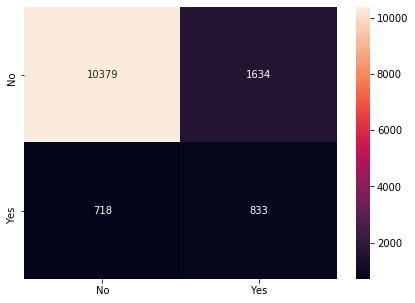

In [84]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')




In [85]:
# Ensemble Learning - AdaBoosting
abcl = AdaBoostClassifier(base_estimator = NB_model,n_estimators=10, random_state=100)
abcl = abcl.fit(X_train, y_train)

0.42170451194337955


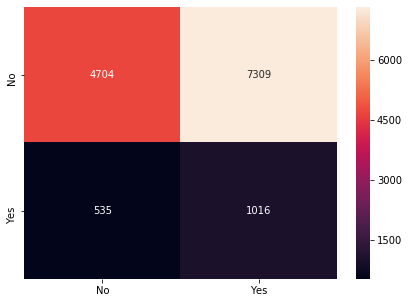

In [86]:
y_predict = abcl.predict(X_test)
print(abcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')

                        3.4 Ensemble technique using K-NN model

In [87]:
from sklearn.neighbors import KNeighborsClassifier

# K-NN model with k = 9
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred))

0.8870539663815984


In [88]:
#                           Ensemble Learning - Bagging(K-NN model)
bgcl = BaggingClassifier( base_estimator=knn,n_estimators=10, random_state=100)
bgcl = bgcl.fit(X_train, y_train)

0.8891182542023002


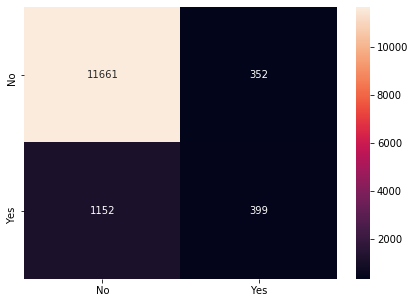

In [89]:
y_predict = bgcl.predict(X_test)

print(bgcl.score(X_test , y_test))

cm=metrics.confusion_matrix(y_test, y_predict,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["No","Yes"]],
                  columns = [i for i in ["No","Yes"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')